In [1]:
from frost_client import *
from data_handling import *

In [2]:
search_station_by_name("Florø")

,id,name,lon,lat,masl,municipality,county,country
0,SN57710,FLORØ LUFTHAMN,5.0278,61.5832,9,KINN,VESTLAND,Norge


In [ ]:
# Choose station, elements, time range
station = "SN60990"  # Vigra
elements = 'mean(wind_speed P1D), max(wind_speed_of_gust P1D), min(wind_speed P1D), max(wind_speed P1D), sum(precipitation_amount P1D), max(air_temperature P1D), min(air_temperature P1D), mean(air_temperature P1D)'
span = "2013-01-01/2023-01-01"

df_long = fetch_data_observations(station, elements, span)

# Convert to a wide format for easier reading
df_wide = pivot_table_elements(df_long)

                       time     source                        element  value  \
0 2013-01-01 00:00:00+00:00  SN60990:0           mean(wind_speed P1D)    8.3   
1 2013-01-01 00:00:00+00:00  SN60990:0    max(wind_speed_of_gust P1D)   17.2   
2 2013-01-01 00:00:00+00:00  SN60990:0            min(wind_speed P1D)    2.8   
3 2013-01-01 00:00:00+00:00  SN60990:0            max(wind_speed P1D)   12.5   
4 2013-01-01 00:00:00+00:00  SN60990:0  sum(precipitation_amount P1D)    6.4   

  unit  
0  m/s  
1  m/s  
2  m/s  
3  m/s  
4   mm  
element                      time  max(air_temperature P1D)  \
0       2013-01-01 00:00:00+00:00                       8.0   
1       2013-01-02 00:00:00+00:00                       5.9   
2       2013-01-03 00:00:00+00:00                       8.6   
3       2013-01-04 00:00:00+00:00                       8.2   
4       2013-01-05 00:00:00+00:00                       8.4   

element  max(wind_speed P1D)  max(wind_speed_of_gust P1D)  \
0                       1

   year  events
0  2013       1
1  2015       1
2  2016       2
3  2019       1
4  2020       1
                         time  weekly_rain
0   2013-01-06 00:00:00+00:00         42.5
1   2013-01-13 00:00:00+00:00          8.3
2   2013-01-20 00:00:00+00:00          0.2
3   2013-01-27 00:00:00+00:00          0.0
4   2013-02-03 00:00:00+00:00         25.4
..                        ...          ...
517 2022-12-04 00:00:00+00:00          NaN
518 2022-12-11 00:00:00+00:00          NaN
519 2022-12-18 00:00:00+00:00          NaN
520 2022-12-25 00:00:00+00:00          NaN
521 2023-01-01 00:00:00+00:00          NaN

[522 rows x 2 columns]


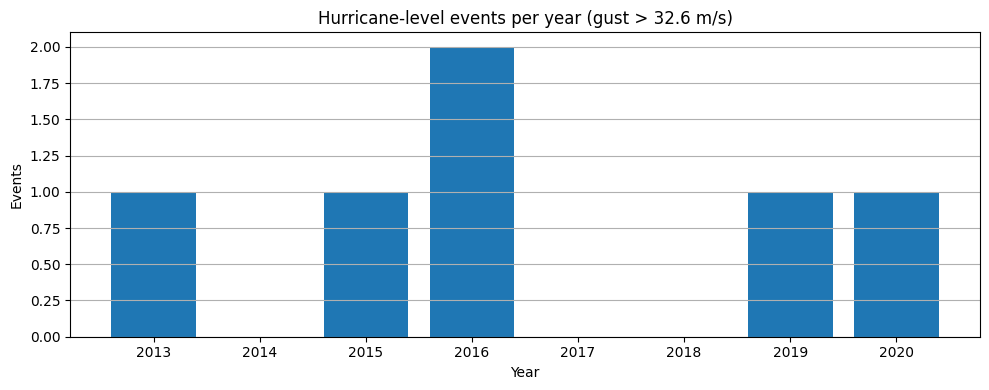

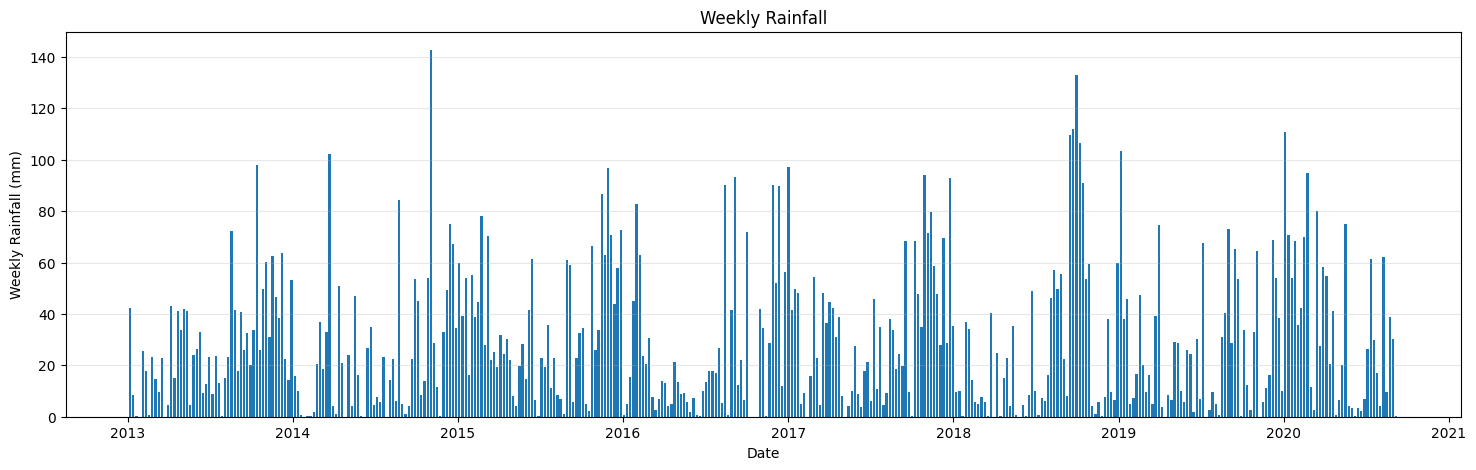

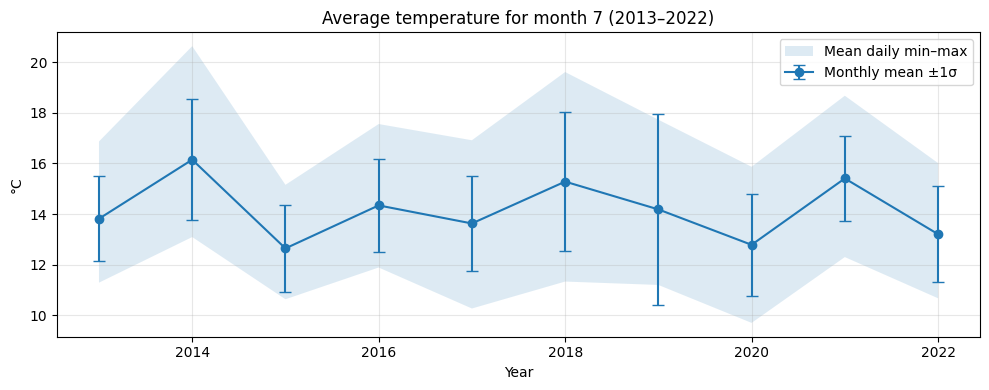

In [4]:
events = hurricane_events(df_wide, wind_col='max(wind_speed_of_gust P1D)')
print(events)

weekly = weekly_rainfall(df_wide, rain_col='sum(precipitation_amount P1D)')
print(weekly)

MONTH = 7
tstats = monthly_temperature_statistics(
    df_wide,
    target_month=MONTH,
    mean_temperature_column="mean(air_temperature P1D)",
    min_temperature_column="min(air_temperature P1D)",
    max_temperature_column="max(air_temperature P1D)",
    year_start=2013,
    year_end=2023,
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(events["year"], events["events"])
plt.title(f"Hurricane-level events per year (gust > {HURRICANE_THRESHOLD} m/s)")
plt.xlabel("Year")
plt.ylabel("Events")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

plt.figure(figsize=(18,5))
plt.bar(weekly["time"], weekly["weekly_rain"], width=5, align="center")  
# width≈5 days so the bars don’t overlap badly

plt.title("Weekly Rainfall")
plt.xlabel("Date")
plt.ylabel("Weekly Rainfall (mm)")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

plot_monthly_temp_with_band(tstats, month=MONTH)